In [1]:
import numpy as np
import pandas as pd

import sys
import os
import random

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen

import cv2

import matplotlib.pyplot as plt

In [2]:
home = os.environ['HOME']
path = os.path.join(home, 'git', 'deep-food', 'gleb_google_images')
path

'/Users/iskriyanavasileva/git/deep-food/gleb_google_images'

In [3]:
background = cv2.imread('../test_images/background_table.jpg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

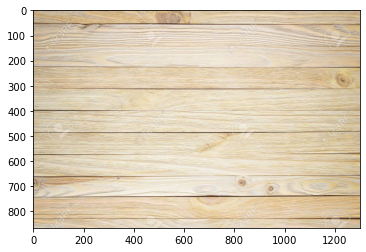

(866, 1300, 3)


In [4]:
plt.imshow(background)
plt.show()
print(background.shape)

In [5]:
ingredient = cv2.imread('../test_images/apple.jpeg')
ingredient = cv2.cvtColor(ingredient, cv2.COLOR_BGR2RGB)

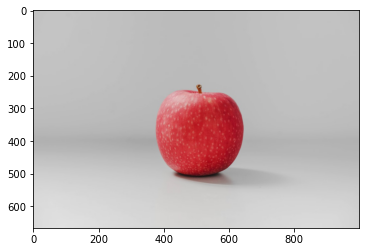

(667, 1000, 3)


In [6]:
plt.imshow(ingredient)
plt.show()
print(ingredient.shape)

In [7]:
rows_b, cols_b, channels_b = background.shape

In [8]:
rows_i = int(rows_b/2)
cols_i = int(cols_b/2)
dim_res = (cols_i, rows_i)
ingredient_res = cv2.resize(ingredient, dim_res)

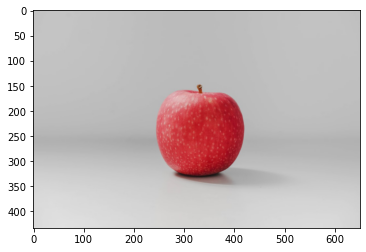

(433, 650, 3)


In [9]:
plt.imshow(ingredient_res)
plt.show()
print(ingredient_res.shape)

In [10]:
# Create a Region of Images (=ROI) in a randomised matter 
rows, cols, channels = ingredient_res.shape

# Randomising position of picture
start_rows = np.random.randint(0, rows_b-rows)
end_rows = start_rows + rows
start_cols = np.random.randint(0, cols_b-cols)
end_cols = start_cols + cols

roi = background[start_rows:end_rows, start_cols:end_cols] 
#roi = background[0:rows, 0:cols]

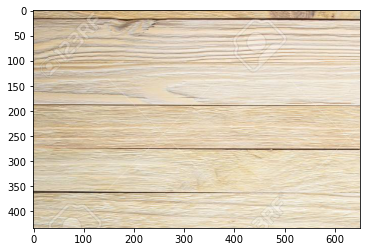

(433, 650, 3)


In [11]:
plt.imshow(roi)
plt.show()
print(roi.shape)

In [12]:
#rotation of image
deg = np.random.randint(0, 360)
M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
print(deg, M)

24 [[  0.91354546   0.40673664 -59.96075696]
 [ -0.40673664   0.91354546 150.90681742]]


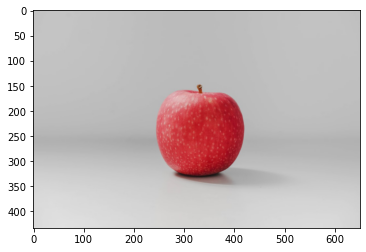

(433, 650, 3)


In [13]:
plt.imshow(ingredient_res)
plt.show()
print(ingredient_res.shape)

In [14]:
ingredient_rot = cv2.warpAffine(ingredient_res, M, (cols, rows))

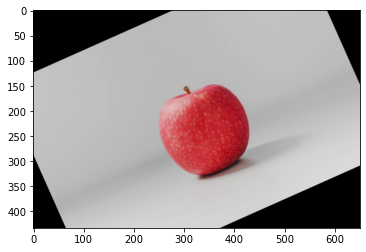

(433, 650, 3)


In [15]:
plt.imshow(ingredient_rot)
plt.show()
print(ingredient_rot.shape)

In [16]:
img2gray = cv2.cvtColor(ingredient_res, cv2.COLOR_BGR2GRAY)

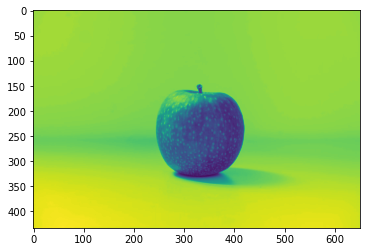

(433, 650)


In [17]:
plt.imshow(img2gray)
plt.show()
print(img2gray.shape)

In [18]:
blur = cv2.GaussianBlur(img2gray, (5,5), 0)

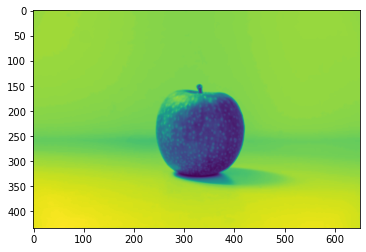

(433, 650)


In [19]:
plt.imshow(blur)
plt.show()
print(blur.shape)

In [20]:
ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [21]:
#plt.imshow(ret)
#plt.show()
#print(ret.shape)

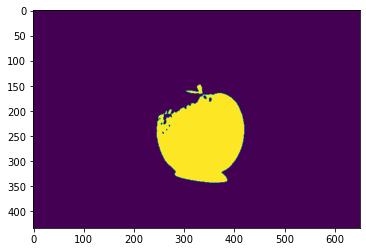

(433, 650)


In [22]:
plt.imshow(mask)
plt.show()
print(mask.shape)

In [23]:
mask_rot = cv2.warpAffine(mask, M, (cols, rows))

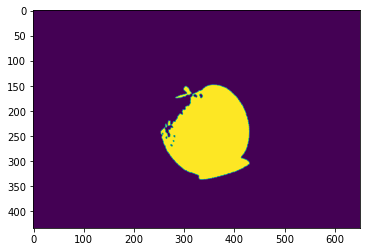

(433, 650)


In [24]:
plt.imshow(mask_rot)
plt.show()
print(mask_rot.shape)

In [25]:
#https://medium.com/@vishwasu2001/basic-arithmetic-and-bitwise-operations-on-images-with-open-cv-part-4-87d04e2a42c 
#mask_inv = cv2.bitwise_not(mask)
mask_inv = cv2.bitwise_not(mask_rot)

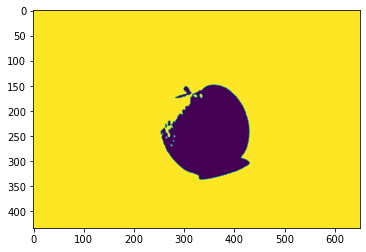

(433, 650)


In [26]:
plt.imshow(mask_inv)
plt.show()
print(mask_inv.shape)

In [27]:
# Black-out the area of the ingredient in ROI in the background image
background_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

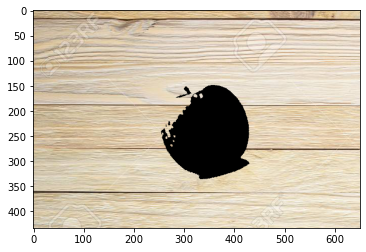

(433, 650, 3)


In [28]:
plt.imshow(background_bg)
plt.show()
print(background_bg.shape)

In [29]:
# Take only region of the ingredient from the ingredient image.
#ingredient_fg = cv2.bitwise_and(ingredient_res, ingredient_res, mask = mask)
ingredient_fg = cv2.bitwise_and(ingredient_rot, ingredient_rot, mask = mask_rot)

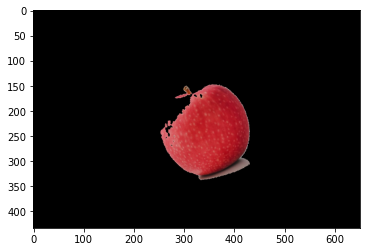

(433, 650, 3)


In [30]:
plt.imshow(ingredient_fg)
plt.show()
print(ingredient_fg.shape)

In [31]:
# Put the ingredient in ROI and modify the main image
dst = cv2.add(background_bg, ingredient_fg)

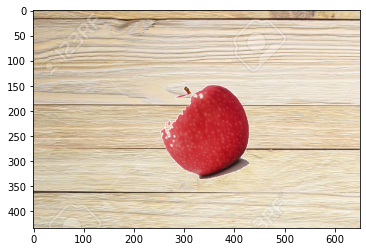

(433, 650, 3)


In [32]:
plt.imshow(dst)
plt.show()
print(dst.shape)

In [33]:
background[start_rows:start_rows+rows, start_cols:start_cols+cols] = dst
#background[0:rows, 0:cols] = dst

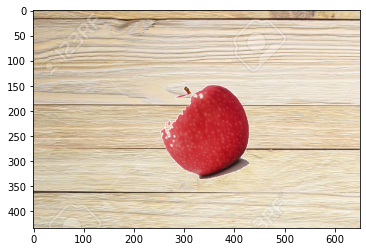

(433, 650, 3)


In [34]:
plt.imshow(background[start_rows:start_rows+rows, start_cols:start_cols+cols])
#plt.imshow(background[0:rows, 0:cols])
plt.show()
print(background[start_rows:start_rows+rows, start_cols:start_cols+cols].shape)

In [35]:
img_comb = background 

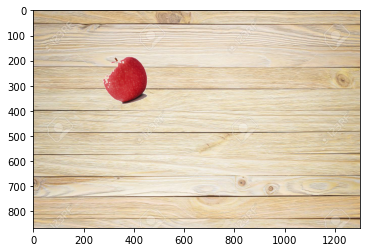

(866, 1300, 3)


In [36]:
plt.imshow(img_comb)
plt.show()
print(img_comb.shape)